# 2D steady-state diffusion

Diffusion problems study the *spreading of substances* (e.g., heat, particles, or pollutants) over time due to random motion, governed mathematically by the diffusion equation. At steady state, the solution depends on boundary conditions (e.g., fixed values or fluxes at edges), with applications spanning heat transfer, environmental pollutant dispersion, biological transport, and material science. The problems are analytically solvable in simple geometries but often require numerical methods for complex scenarios.

## Problem setup

As shown in the figure, there is a two-dimensional heated plate with a length of $L=0.3$ m, a height of $H=0.4$ m, and a thickness of 0.01 m. The plate has a thermal conductivity of $k=1000$ W/(m·K). The western boundary is subjected to a constant heat flux with a flux density of $q=500$ kW/m$^2$. The eastern boundary is adiabatic, while the southern boundary exchanges heat by convection with ambient air at a temperature of $T_{\inf} = 200$ &deg;C, with a convective heat transfer coefficient of $h = 253.165$ W/(m$^2 \cdot$K). The northern boundary is maintained at a constant temperature of $T_N = 100$ &deg;C. Determine the temperature distribution within the plate.

<!-- <div style="text-align:center">
  <img src="https://gitlab.com/mscm/computational-fluids/-/raw/main/images/diffusion2d.jpg?ref_type=heads" alt="2D diffusion" width="350" />
</div> -->

![2D diffusion](images/diffusion2d.jpg)

The mathematical model for two-dimensional steady-state diffusion problem is

$$\frac{\partial}{\partial x} \left( k\frac{\partial T}{\partial x} \right) + \frac{\partial}{\partial y} \left( k\frac{\partial T}{\partial y} \right) = 0.$$

The boundary conditions are

$$-k\frac{\partial T}{\partial x}|_{x=0} = 500000, \quad k\frac{\partial T}{\partial x}|_{x=L} = 0, \quad k\frac{\partial T}{\partial y}|_{y=0} = h\left( T-T_{\infty} \right), \quad T|_{y=H} = 100.$$

## Solve problem

### Define 2D grid

Take a uniform grid $\delta x = \delta x = 0.1$ m.

### Discretize 2D diffusion equation

There are **nine** different types of nodes we have to deal with separately. Make $k = k_w = k_e = k_s = k_n$ and $A = A_w = A_e = A_s = A_n$, derive the discrete equations for the internal and boundary nodes as following.

**Internal Nodes 6 and 7**

The discrete equation satisfied by the internal nodes in the plate is

$$a_P T_P = a_W T_W + a_E T_E + a_S T_S + a_N T_N,$$

where

$$a_W = a_E = a_S = a_N = \frac{kA}{\delta x}, \quad a_P = a_W + a_E + a_S + a_N = \frac{4kA}{\delta x}.$$

**Corner Node 1**

The western boundary is subject to a constant heat flux, we have

$$a_W = 0, \quad (S_P)_w = 0, \quad (S_u)_w = qA.$$

On the east side, we have

$$a_E = \frac{kA}{\delta x}.$$

The southen boundary exchanges heat with the ambient air by convection, we have

$$a_S = 0, \quad (S_P)_s = -\frac{A}{1/h + \delta x/(2k)},$$

$$(S_u)_s = \frac{A}{1/h + \delta x/(2k)} T_{\infty}.$$

On the north side, we have

$$a_N = \frac{kA}{\delta x}.$$

The overall source term becomes

$$S_P = (S_P)_w + (S_P)_s = -\frac{A}{1/h + \delta x/(2k)}, \quad S_u = (S_u)_w + (S_u)_s = qA + \frac{A}{1/h + \delta x/(2k)} T_{\infty}.$$

Therefore, the discrete equation for Node 1 is

$$a_P = a_W + a_E + a_S + a_N - S_P = 0 + \frac{kA}{\delta x} + 0 + \frac{kA}{\delta x} - \left[ -\frac{A}{1/h + \delta x/(2k)} \right],$$

$$\left[ \frac{2kA}{\delta x} + \frac{A}{1/h + \delta x/(2k)} \right] T_P = \frac{kA}{\delta x} T_E + \frac{kA}{\delta x} T_N + \left[ qA + \frac{A}{1/h + \delta x/(2k)} T_{\infty} \right].$$

**Edge Nodes 2 and 3**

On the west side, we have the constant heat flux boundary

$$a_W = 0, \quad (S_P)_w = 0, \quad (S_u)_w = qA.$$

On the other sides, we have

$$a_E = a_S = a_N = \frac{kA}{\delta x}.$$

So the discrete equations for Nodes 2 and 3 can be written as

$$a_P = a_W + a_E + a_S + a_N - S_P = 0 + \frac{kA}{\delta x} + \frac{kA}{\delta x} + \frac{kA}{\delta x} - 0 = \frac{3kA}{\delta x},$$

$$\left( \frac{3k}{\delta x}A \right) T_P = \frac{kA}{\delta x} T_E + \frac{kA}{\delta x} T_S + \frac{kA}{\delta x} T_N + qA.$$

**Corner Node 4**

On the west side, we still have the constant heat flux boundary, so we have

$$a_W = 0, \quad (S_P)_w = 0, \quad (S_u)_w = qA.$$

On the east and south sides, we have

$$a_E = a_S = \frac{kA}{\delta x}.$$

On the north side, the temperature is fixed at 100 &deg;C, so we have

$$a_N = 0, \quad (S_P)_n = -\frac{2kA}{\delta x}, \quad (S_u)_n = \frac{2kA}{\delta x} T_N.$$

The overall source terms becomes

$$S_u = (S_u)_w + (S_u)_n = qA + \frac{2kA}{\delta x} T_N,$$

$$S_P = (S_P)_w + (S_P)_n = 0 + \left( -\frac{2kA}{\delta x} \right) = -\frac{2kA}{\delta x}.$$

Therefore, the discrete equation for Node 4 is

$$a_P = a_W + a_E + a_S + a_N - S_P = 0 + \frac{kA}{\delta x} + \frac{kA}{\delta x} - \left( -\frac{2kA}{\delta x} \right) = \frac{4kA}{\delta x},$$

$$\left( \frac{4kA}{\delta x} \right)T_P = \frac{kA}{\delta x}T_E + \frac{kA}{\delta x}T_S + \left( qA + \frac{2kA}{\delta x} T_N \right).$$

**Edge Node 5**

On the west, east and north sides, we have

$$a_W = a_E = a_N = \frac{kA}{\delta x}.$$

On the south side, we have the convective heat exchange boundary

$$a_S = 0, \quad (S_P)_s = -\frac{A}{1/h + \delta x/(2k)}, \quad (S_u)_s = \frac{A}{1/h + \delta x/(2k)} T_{\infty}.$$

Therefore, the discrete equation for Node 5 becomes

$$a_P = a_W + a_E + a_S + a_N - S_P = \frac{kA}{\delta x} + \frac{kA}{\delta x} + 0 + \frac{kA}{\delta x} - \left[ -\frac{A}{1/h + \delta x/(2k)} \right] = \frac{3kA}{\delta x} + \frac{A}{1/h + \delta x/(2k)},$$

$$\left[ \frac{3kA}{\delta x} + \frac{A}{1/h + \delta x/(2k)} \right]T_P = \frac{kA}{\delta x}T_W + \frac{kA}{\delta x}T_E + \frac{kA}{\delta x}T_N + \left[ \frac{A}{1/h + \delta x/(2k)} T_{\infty} \right].$$

**Edge Node 8**

On the west, east and south sides, we have

$$a_W = a_E = a_S = \frac{kA}{\delta x}.$$

The northern side is the boundary with a fixed tempeture, so we have

$$a_N = 0, \quad (S_P)_n = -\frac{2kA}{\delta x}, \quad (S_u)_n = \frac{2kA}{\delta x} T_N.$$

Therefore, the discrete equation for Node 8 becomes

$$a_P = a_W + a_E + a_S + a_N - S_P = \frac{kA}{\delta x} + \frac{kA}{\delta x} + \frac{kA}{\delta x} + 0 - \left( -\frac{2kA}{\delta x} \right) = \frac{5kA}{\delta x},$$

$$\frac{5kA}{\delta x}T_P = \frac{kA}{\delta x}T_W + \frac{kA}{\delta x}T_E + \frac{kA}{\delta x}T_S + \frac{2kA}{\delta x} T_N.$$

**Corner Node 9**

On the west and north sides, we have

$$a_W = a_N = \frac{kA}{\delta x}.$$

On the south side, we have convective heat exchange, so

$$a_S = 0, \quad (S_P)_s = -\frac{A}{1/h + \delta x/(2k)}, \quad (S_u)_s = \frac{A}{1/h + \delta x/(2k)} T_{\infty}.$$

The eastern side is adiabatic, so we have

$$a_E = 0, \quad (S_P)_e = 0, \quad (S_u)_e = 0.$$

Therefore, the discrete equation for Node 9 is

$$a_P = a_W + a_E + a_S + a_N - S_P = \frac{kA}{\delta x} + 0 + 0 + \frac{kA}{\delta x} - \left[ -\frac{A}{1/h + \delta x/(2k)} \right] = \frac{2kA}{\delta x} + \frac{A}{1/h + \delta x/(2k)},$$

$$\left[ \frac{2kA}{\delta x} + \frac{A}{1/h + \delta x/(2k)} \right] T_P = \frac{kA}{\delta x} T_W + \frac{kA}{\delta x} T_N + \frac{A}{1/h + \delta x/(2k)} T_{\infty}.$$

**Edge Nodes 10 and 11**

On the west, south and north side, we have

$$a_W = a_S = a_N = \frac{kA}{\delta x}.$$

The eastern side is adiabatic, so we have

$$a_E = 0, \quad (S_P)_e = 0, \quad (S_u)_e = 0.$$

Therefore, the discrete equations for Nodes 10 and 11 are

$$a_P = a_W + a_E + a_S + a_N - S_P = \frac{kA}{\delta x} + 0 + \frac{kA}{\delta x} + \frac{kA}{\delta x} = \frac{3kA}{\delta x},$$

$$\frac{3kA}{\delta x}T_P = \frac{kA}{\delta x}T_W + \frac{kA}{\delta x}T_S + \frac{kA}{\delta x}T_N,$$

**Corner Node 12**

On the west and south sides, we have

$$a_W = a_S = \frac{kA}{\delta x}.$$

The northern side is the boundary with a fixed tempeture, so we have

$$a_N = 0, \quad (S_P)_n = -\frac{2kA}{\delta x}, \quad (S_u)_n = \frac{2kA}{\delta x} T_N.$$

The eastern side is adiabatic, so we have

$$a_E = 0, \quad (S_P)_e = 0, \quad (S_u)_e = 0.$$

Therefore, the discrete equation for Node 12 is

$$a_P = a_W + a_E + a_S + a_N - S_P = \frac{kA}{\delta x} + 0 + \frac{kA}{\delta x} + 0 - \left( -\frac{2kA}{\delta x} \right) = \frac{4kA}{\delta x},$$

$$\frac{4kA}{\delta x} T_P = \frac{kA}{\delta x} T_W + \frac{kA}{\delta x}T_S + \frac{2kA}{\delta x} T_N.$$

### Solve algebraic equations

In [7]:
# Step 0: import the required libraries
import numpy as np
from matplotlib import pyplot as plt
import time

In [8]:
# Step 1: parameter declarations
lx = 0.3                                # length of the plate
ly = 0.4                                # height of the plate
nx = 3                                  # number of grid points in x-direction
ny = round(ly/lx*nx)                    # number of grid points in y-direction
dx = lx/nx                              # grid spacing in x-direction
dy = ly/ny                              # grid spacing in y-direction
x = np.linspace(0.5*dx, lx-0.5*dx, nx)  # x-coordinates of the grid points
y = np.linspace(0.5*dy, ly-0.5*dy, ny)  # y-coordinates of the grid points
h = 0.01                                # plate thickness
area = h*dx                             # flux area

k = 1000                                # coefficient for heat conduction
q = 500000                              # heat flux at the west boundary
Tinf = 200                              # ambient temperature in the south
h = 253.165                             # convective heat transfer coefficient at the southern edge
Tn = 100                                # constant temperature at the northern edge

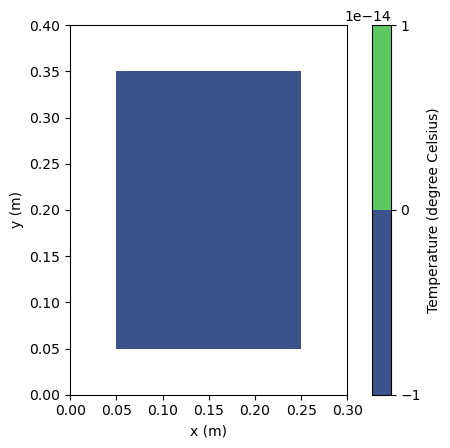

In [9]:
# Step 2.1: set initial condition (Note the order of nx and ny)
T = np.zeros((ny, nx))                  # a numpy array with all elements equal to zero

# Step 2.2: visualize initial temperature distribution
plt.figure()                            # create a new figure
cs = plt.contourf(x, y, T, levels=20)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('scaled')
ax = plt.gca()
ax.set_xlim(0, 0.3)
ax.set_ylim(0, 0.4)
cbar = plt.colorbar(cs)                 # add color bar to the figure
cbar.ax.set_ylabel('Temperature (degree Celsius)')
plt.show()                              # show the figure

**Question**: How come the contour is shown only in the middle of the domain?

In [10]:
# Step 3: finite volume calculations
Told = np.zeros((ny, nx))               # placeholder array to advance the solution
Tdiff = 1                               # temperature difference for convergence
cnt = 0                                 # counter for the number of iterations
t_start = time.perf_counter()           # start time for performance measurement

while Tdiff > 1e-3:                     # loop until the difference is less than 1e-3
    cnt += 1                            # increment the counter
    Told = T.copy()                     # copy the existing (old) values of T into Told

    for row in range(ny):
        for col in range(nx):
            # left-bottom corner
            if row == 0 and col == 0:
                T[row, col] = ((k*area/dx)*Told[row+1, col] + ((k*area/dx))*Told[row, col+1] + q*area + area*Tinf/(1/h + dx/(2*k))) / (2*k*area/dx + area/(1/h + dx/(2*k)))
            # right-bottom corner
            elif row == 0 and col == nx-1:
                T[row, col] = ((k*area/dx)*Told[row+1, col] + (k*area/dx)*Told[row, col-1] + area/(1/h + dx/(2*k))*Tinf) / (2*k*area/dx + area/(1/h + dx/(2*k)))
            # left-top corner
            elif row == ny-1 and col == 0:
                T[row, col] = ((k*area/dx)*Told[row-1, col] + (k*area/dx)*Told[row, col+1] + (q*area + 2*k*area/dx*Tn)) / (4*k*area/dx)
            # right-top corner
            elif row == ny-1 and col == nx-1:
                T[row, col] = ((k*area/dx)*Told[row-1, col] + (k*area/dx)*Told[row, col-1] + (2*k*area/dx*Tn)) / (4*k*area/dx)
            # left boundary
            elif col == 0:
                T[row, col] = ((k*area/dx)*Told[row-1, col] + (k*area/dx)*Told[row+1, col] + (k*area/dx)*Told[row, col+1] + q*area) / (3*k*area/dx)
            # right boundary
            elif col == nx-1:
                T[row, col] = ((k*area/dx)*Told[row-1, col] + (k*area/dx)*Told[row+1, col] + (k*area/dx)*Told[row, col-1]) / (3*k*area/dx)
            # bottom boundary
            elif row == 0:
                T[row, col] = ((k*area/dx)*Told[row, col-1] + (k*area/dx)*Told[row, col+1] + (k*area/dx)*Told[row+1, col] + (area*Tinf/(1/h + dx/(2*k)))) / (3*k*area/dx + area/(1/h + dx/(2*k)))
            # top boundary
            elif row == ny-1:
                T[row, col] = ((k*area/dx)*Told[row, col-1] + (k*area/dx)*Told[row, col+1] + (k*area/dx)*Told[row-1, col] + (2*k*area/dx*Tn)) / (5*k*area/dx)
            # internal nodes
            else:
                T[row, col] = 0.25 * (Told[row, col-1] + Told[row, col+1] + Told[row-1, col] + Told[row+1, col])
    
    # calculate the difference between the new and the old temperature distributions
    Tdiff = np.sum(np.abs(T - Told))
    if cnt % 10 == 0:                   # print every 100 iterations
        print('Iteration {}: Tdiff = {:.4f}'.format(cnt, Tdiff))


# stop the timer and print the iteration results
t_end = time.perf_counter()
print('******************************************')
print('Final temperature difference: {:.4f}'.format(Tdiff))
print('Number of iterations: {}'.format(cnt))
print('Elapsed time: {:.3f} seconds'.format(t_end - t_start))

Iteration 10: Tdiff = 71.3782
Iteration 20: Tdiff = 39.7494
Iteration 30: Tdiff = 22.2378
Iteration 40: Tdiff = 12.4416
Iteration 50: Tdiff = 6.9609
Iteration 60: Tdiff = 3.8945
Iteration 70: Tdiff = 2.1789
Iteration 80: Tdiff = 1.2190
Iteration 90: Tdiff = 0.6820
Iteration 100: Tdiff = 0.3816
Iteration 110: Tdiff = 0.2135
Iteration 120: Tdiff = 0.1194
Iteration 130: Tdiff = 0.0668
Iteration 140: Tdiff = 0.0374
Iteration 150: Tdiff = 0.0209
Iteration 160: Tdiff = 0.0117
Iteration 170: Tdiff = 0.0065
Iteration 180: Tdiff = 0.0037
Iteration 190: Tdiff = 0.0020
Iteration 200: Tdiff = 0.0011
******************************************
Final temperature difference: 0.0010
Number of iterations: 203
Elapsed time: 0.004 seconds


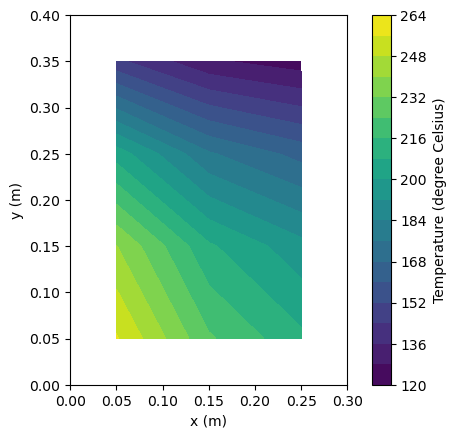

In [11]:
# Step 4: visualize results after advancing in time
fig = plt.figure()
cs = plt.contourf(x, y, T, levels=20)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('scaled')
ax = plt.gca()
ax.set_xlim(0, 0.3)
ax.set_ylim(0, 0.4)
cbar = plt.colorbar(cs)
cbar.ax.set_ylabel('Temperature (degree Celsius)')
plt.show()

We can check the final temperature at the center of the plate.

In [12]:
# Step 5: examine results of interest
print('The temperature at the plate center is {:.4f} degree Celsius.'.format(0.5*(T[ny//2, nx//2] + T[ny//2-1, nx//2])))

The temperature at the plate center is 193.1574 degree Celsius.


## Exercise

1. Check the grid independence. Increase the resolution until the numerical result (e.g., the temperature at the plate center) does not change any more.

2. Modify the code such that different spatial resolutions in the horizontal and vertical directions can be applied. (*optional*)